In [1]:
import fiftyone as fo
from fiftyone import ViewField as F
import glob
import numpy as np
from tidecv import TIDE, datasets
dataset = fo.load_dataset('RumexWeeds')


In [2]:
dataset

Name:        RumexWeeds
Media type:  image
Num samples: 5510
Persistent:  True
Tags:        ['20210806_hegnstrup_seq0', '20210806_hegnstrup_seq1', '20210806_hegnstrup_seq10', '20210806_hegnstrup_seq11', '20210806_hegnstrup_seq12', '20210806_hegnstrup_seq13', '20210806_hegnstrup_seq14', '20210806_hegnstrup_seq15', '20210806_hegnstrup_seq16', '20210806_hegnstrup_seq17', '20210806_hegnstrup_seq2', '20210806_hegnstrup_seq3', '20210806_hegnstrup_seq4', '20210806_hegnstrup_seq5', '20210806_hegnstrup_seq6', '20210806_hegnstrup_seq7', '20210806_hegnstrup_seq8', '20210806_hegnstrup_seq9', '20210806_stengard_seq0', '20210806_stengard_seq1', '20210806_stengard_seq10', '20210806_stengard_seq11', '20210806_stengard_seq12', '20210806_stengard_seq13', '20210806_stengard_seq14', '20210806_stengard_seq15', '20210806_stengard_seq16', '20210806_stengard_seq17', '20210806_stengard_seq18', '20210806_stengard_seq19', '20210806_stengard_seq2', '20210806_stengard_seq20', '20210806_stengard_seq3', '20210806_st

In [5]:
if 'yolox_s_rumexweeds_tesat' not in dataset.list_evaluations():
    results_yolox_s_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_s_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolox_s_rumexweeds")
else:
    results_yolox_s_test = dataset.load_evaluation_results('yolox_s_rumexweeds')

Evaluating detections...
 100% |███████████████| 1535/1535 [15.8s elapsed, 0s remaining, 89.9 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [26.6s elapsed, 0s remaining, 66.4 samples/s]       


In [3]:
if "yolox_l_rumexweeds_test" not in dataset.list_evaluations():
    results_yolox_l_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_l_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolox_l_rumexweeds_test")
else:
    results_yolox_l_test = dataset.load_evaluation_results('yolox_l_rumexweeds_test')

Evaluating detections...
 100% |███████████████| 1535/1535 [11.3s elapsed, 0s remaining, 134.1 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1535/1535 [17.2s elapsed, 0s remaining, 93.0 samples/s]      


In [4]:
if "yolox_dn53_rumexweeds_test" not in dataset.list_evaluations():
    results_yolox_dn53_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolox_DarkNet53_rumexweeds', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolox_dn53_rumexweeds_test")
else:
    results_yolox_dn53_test = dataset.load_evaluation_results('yolox_dn53_rumexweeds_test')

Evaluating detections...
 100% |███████████████| 1535/1535 [21.4s elapsed, 0s remaining, 78.3 samples/s]       
Performing IoU sweep...
 100% |███████████████| 1535/1535 [35.5s elapsed, 0s remaining, 59.2 samples/s]       


In [6]:
if "yolor_p6_rumexweeds_tesat" not in dataset.list_evaluations():
    results_yolor_p6_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolor_p6_1920', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolor_p6_rumexweeds_test")
else:
    results_yolor_p6_test = dataset.load_evaluation_results("yolor_p6_rumexweeds_test")

Evaluating detections...
 100% |███████████████| 1535/1535 [16.8s elapsed, 0s remaining, 69.6 samples/s]       
Performing IoU sweep...
 100% |███████████████| 1535/1535 [29.3s elapsed, 0s remaining, 40.2 samples/s]      


In [10]:
if "yolov5_l_rumexweeds_test" not in dataset.list_evaluations():
    results_yolov5_l_test = dataset.match_tags(['test']).evaluate_detections('predictions_yolov5_l', gt_field='ground_truth_detections', classes=['rumex_obtusifolius'], method='coco', compute_mAP=True, eval_key="yolov5_l_rumexweeds_test_json")
else:
    results_yolov5_l_test = dataset.load_evaluation_results("yolov5_l_rumexweeds_test")

In [7]:
print(f"dataset : mAP")
for eval in dataset.list_evaluations():
    results = dataset.load_evaluation_results(eval)
    print(f"{eval} : {results.mAP()}")

dataset : mAP
yolor_p6_rumexweeds_test : 0.08965492589606232
yolov5_l_rumexweeds_test : 0.1931723510508127
yolox_dn53_rumexweeds_test : 0.1940505568469887
yolox_dn53_rumexweeds_test_json : 0.1940505568469887
yolox_l_rumexweeds_test : 0.13810074617195067
yolox_l_rumexweeds_test_json : 0.13777789589589978
yolox_s_rumexweeds : 0.14324952532430593
yolox_s_rumexweeds_json : 0.14324952532430593
yolox_s_rumexweeds_test : 0.0007364151488444492


In [8]:
rumex_obs_only_view = dataset.filter_labels('ground_truth_detections', F("label").is_in(["rumex_obtusifolius"]), only_matches=False)
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_l_rumexweeds", labels_path="yolox_l_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_s_rumexweeds", labels_path="yolox_s_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolox_DarkNet53_rumexweeds", labels_path="yolox_DarkNet53_rumexweeds_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolor_p6_1920", labels_path="yolor_p6_1920_preds.json")
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="predictions_yolov5_l", labels_path="yolor_v5_l_preds.json")

 100% |███████████████| 1535/1535 [23.0s elapsed, 0s remaining, 72.6 samples/s]       
 100% |███████████████| 1535/1535 [23.9s elapsed, 0s remaining, 64.6 samples/s]       
 100% |███████████████| 1535/1535 [24.0s elapsed, 0s remaining, 70.9 samples/s]       
 100% |███████████████| 1535/1535 [24.4s elapsed, 0s remaining, 65.2 samples/s]       
 100% |███████████████| 1535/1535 [23.1s elapsed, 0s remaining, 72.0 samples/s]       


In [43]:
rumex_obs_only_view.match_tags(['test']).export(dataset_type=fo.types.COCODetectionDataset, label_field="ground_truth_detections", labels_path="ground_truth_detections.json")

 100% |███████████████| 1535/1535 [41.9s elapsed, 0s remaining, 37.2 samples/s]      


-- yolor_p6_1920_preds --

bbox AP @ 50: 5.97

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00    10.31     0.00     0.00    22.41     0.44  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      46.50       4.83  

-- yolor_v5_l_preds --

bbox AP @ 50: 26.45

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   dAP     0.00    12.26     0.00     0.00    11.81    15.78  

        Special Error
  Type   FalsePos   FalseNeg  
-----------------------------
   dAP      22.07      25.57  

-- yolox_DarkNet53_rumexweeds_preds --

bbox AP @ 50: 9.77

                         Main Errors
  Type      Cls      Loc     Both     Dupe      Bkg     Miss  
-------------------------------------------------------------
   d

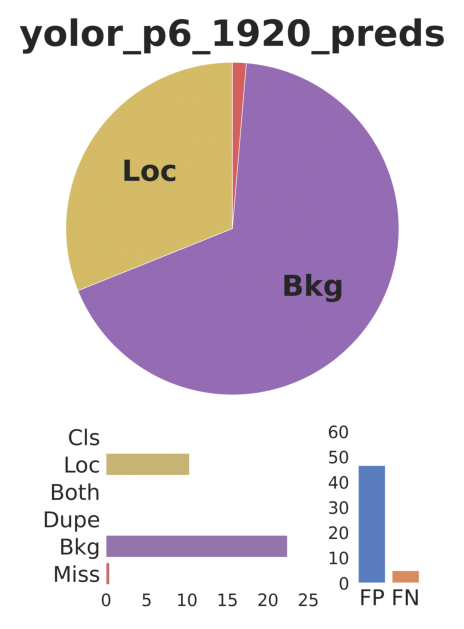

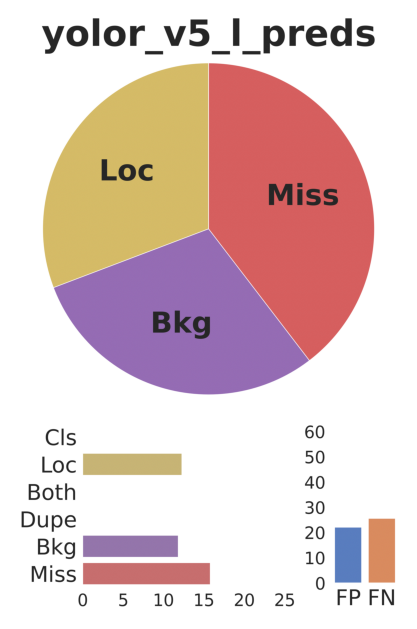

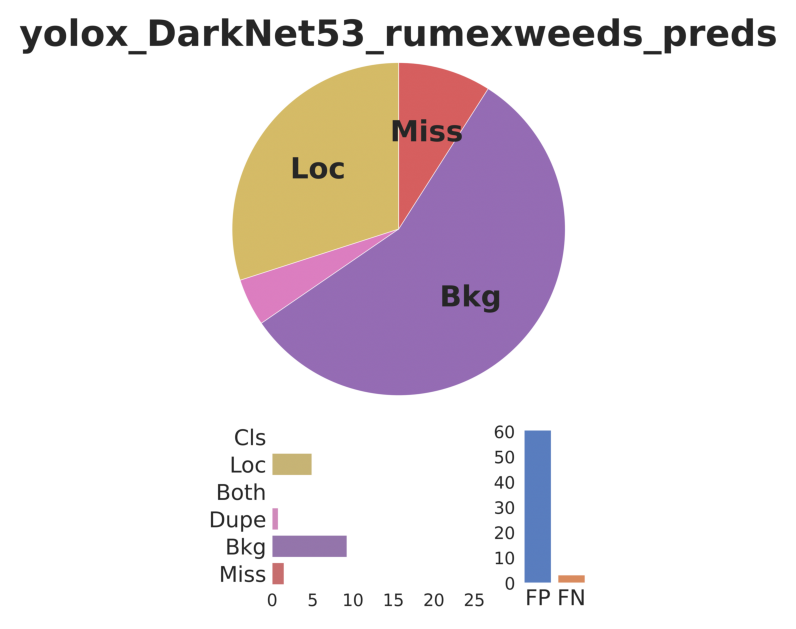

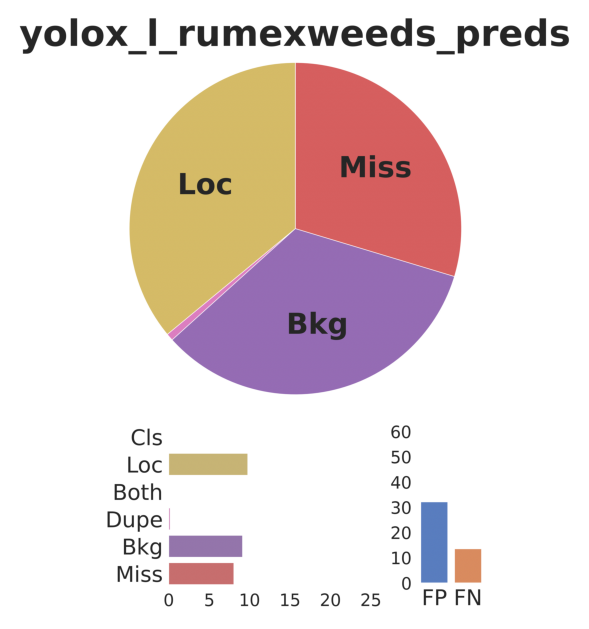

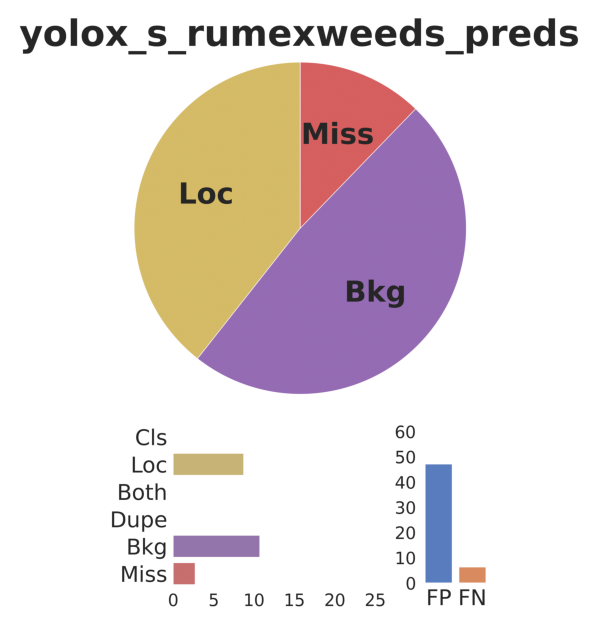

In [9]:
tide = TIDE()
for pred_file in glob.glob('*preds*.json'):
    tide.evaluate(datasets.COCO("ground_truth_detections.json", "RumexWeeds_test"), datasets.COCO(pred_file), mode=TIDE.BOX)
tide.summarize()
tide.plot()

In [10]:
session = fo.Session(dataset=dataset, auto=False)

## Calculate the IoU between the different confidence threshold variants
IoU close to 1 implies that the higher confidence threshold in the YOLOx framework just has a filtering effect, not an overall altering effect
### YOLOX DN 53

In [40]:
def iou(bb1, bb2):
    """
    Calculates the IoU of two bounding boxes (FiftyOne format)

    Parameters
    -----------
    bb1: list of 4 floats, [<top-left-x>, <top-left-y>, <width>, <height>]
    bb2: list of 4 floats, [<top-left-x>, <top-left-y>, <width>, <height>]

    Returns
    ------
    iou: float between 0 and 1
    """
    assert isinstance(bb1, list), "must be list"
    assert isinstance(bb2, list), "Must be List"
    assert len(bb1) > 0, "Must contain detections"
    assert len(bb2) > 0, "Must contain detections"
    ymax1 = bb1[1] + bb1[3]
    ymax2 = bb2[1] + bb2[3]
    xmax1 = bb1[0] + bb1[2]
    xmax2 = bb2[0] + bb2[2]
    xmin1 = bb1[0]
    xmin2 = bb2[0]
    ymin1 = bb1[1]
    ymin2 = bb2[1]
    
    if max(xmin1, xmin2) > min(xmax1, xmax2) or max(ymin1 ,ymin2) > min(ymax1, ymax2):
        return 0, 0, 0
    union = (max(ymax1, ymax2) - min(ymin1, ymin2)) * \
            (max(xmax1, xmax2) - min(xmin1, xmin2)) - \
            (abs(ymax1 - ymax2) * abs(xmin1 - xmin2)) - \
            (abs(ymin2 - ymin1)* abs(xmax2 - xmax1))
    intersection = (max(ymin1, ymin2) - min(ymax1, ymax2)) * \
                    (max(xmin1, xmin2) - min(xmax1, xmax2))
    
    return intersection / union, intersection, union

bboxes_low_conf = dataset.values('predictions_yolox_DarkNet53_rumexweeds.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolox_DarkNet53_rumexweeds_testconf_0-25.detections.bounding_box')

high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    for xx in x:
        for yy in y:
            ious.append(iou(xx,yy)[0]) 
    high_conf_low_conf_maxious.append(max(ious))

print(min(high_conf_low_conf_maxious))
print(max(high_conf_low_conf_maxious))
print(np.mean(high_conf_low_conf_maxious))




ValueError: Field 'predictions_yolox_DarkNet53_rumexweeds_testconf_0-25' does not exist on collection 'RumexWeeds'

In [35]:
bboxes_low_conf = dataset.values('predictions_yolox_l_rumexweeds.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolox_l_rumexweeds_testconf_0-25.detections.bounding_box')
high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    for xx in x:
        for yy in y:
            ious.append(iou(xx,yy)) 
    if len(ious) > 0:
        high_conf_low_conf_maxious.append(max(ious))

if len(high_conf_low_conf_maxious) > 0:
    print(min(high_conf_low_conf_maxious))
    print(max(high_conf_low_conf_maxious))
    print(np.mean(high_conf_low_conf_maxious))


In [38]:
bboxes_low_conf = dataset.values('predictions_yolox_s_rumexweeds.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolox_s_rumexweeds_testconf_0-25.detections.bounding_box')
high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    for xx in x:
        for yy in y:
            ious.append(iou(xx,yy)[0])
    if len(ious) > 0:
        high_conf_low_conf_maxious.append(max(ious))

if len(high_conf_low_conf_maxious) > 0:
    print(min(high_conf_low_conf_maxious))
    print(max(high_conf_low_conf_maxious))
    print(np.mean(high_conf_low_conf_maxious))


0.7278860881507293
0.9997704209677131
0.9927972620701635


In [42]:
bboxes_low_conf = dataset.values('predictions_yolor_p6_1920.detections.bounding_box')
bboxes_high_conf = dataset.values('predictions_yolor_p6_1920_025_045.detections.bounding_box')
print(len(bboxes_high_conf), len(bboxes_low_conf))
high_conf_low_conf_maxious = []
for x,y in zip(bboxes_low_conf, bboxes_high_conf):
    ious = []
    try:
        for xx in x:
            for yy in y:
                ious.append(iou(xx,yy)[0])
        if len(ious) > 0:
            high_conf_low_conf_maxious.append(max(ious))
    except Exception as e:
        pass

if len(high_conf_low_conf_maxious) > 0:
    print(min(high_conf_low_conf_maxious))
    print(max(high_conf_low_conf_maxious))
    print(np.mean(high_conf_low_conf_maxious))

5510 5510
0.9075221064631179
1.0
0.9999130251674807


In [35]:
session = fo.Session(dataset=dataset, auto=False)